# Método de la Bisección
## Búsqueda de raíces por división de intervalos

In [1]:
# Celda 1: Importaciones
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Celda 2: Función objetivo (por defecto)
f = lambda x: x**3 - 2*x - 5
# Función ejemplo: x³ - 2x - 5, raíz aproximada ≈ 2.09455

In [3]:
# Celda 3: Implementación del método de bisección
def metodo_bisecion(f, x0, x1, tol=1e-6, max_iter=100):
    # Validar que hay cambio de signo
    if f(x0) * f(x1) >= 0:
        raise ValueError("f(x0) y f(x1) deben tener signos opuestos")
    
    iteraciones, xn_vals, fxn_vals, errores = [], [], [], []
    
    for i in range(max_iter):
        xn = (x0 + x1) / 2
        fxn = f(xn)
        error = abs(x1 - x0) / 2
        
        iteraciones.append(i + 1)
        xn_vals.append(xn)
        fxn_vals.append(fxn)
        errores.append(error)
        
        if error < tol:
            break
            
        if f(x0) * fxn < 0:
            x1 = xn
        else:
            x0 = xn
    
    tabla = pd.DataFrame({
        'Iteración': iteraciones,
        'x_n': np.round(xn_vals, 6),
        'f(x_n)': np.round(fxn_vals, 6),
        'Error_abs': np.round(errores, 6)
    })
    
    return xn, tabla, xn_vals

In [4]:
# Celda 4: Ejecución con caso por defecto
raiz, tabla, historial = metodo_bisecion(f, 2, 3)

print(f"Raíz encontrada: x = {raiz:.6f}")
print(f"Valor de la función: f(x) = {f(raiz):.6f}")
print("\nTabla de iteraciones:")
print(tabla)

Raíz encontrada: x = 2.094552
Valor de la función: f(x) = 0.000006

Tabla de iteraciones:
    Iteración       x_n    f(x_n)  Error_abs
0           1  2.500000  5.625000   0.500000
1           2  2.250000  1.890625   0.250000
2           3  2.125000  0.345703   0.125000
3           4  2.062500 -0.351318   0.062500
4           5  2.093750 -0.008942   0.031250
5           6  2.109375  0.166836   0.015625
6           7  2.101562  0.078562   0.007812
7           8  2.097656  0.034714   0.003906
8           9  2.095703  0.012862   0.001953
9          10  2.094727  0.001954   0.000977
10         11  2.094238 -0.003495   0.000488
11         12  2.094482 -0.000771   0.000244
12         13  2.094604  0.000592   0.000122
13         14  2.094543 -0.000090   0.000061
14         15  2.094574  0.000251   0.000031
15         16  2.094559  0.000081   0.000015
16         17  2.094551 -0.000004   0.000008
17         18  2.094555  0.000038   0.000004
18         19  2.094553  0.000017   0.000002
19        

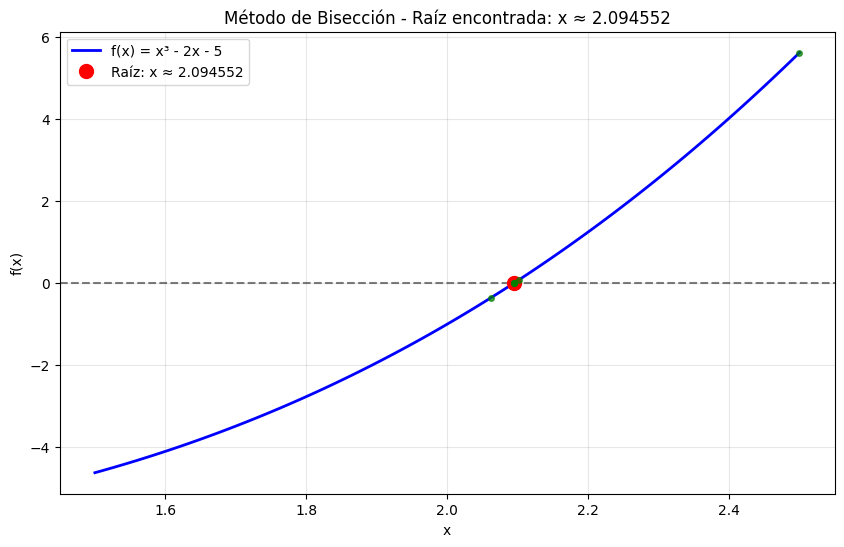

In [5]:
# Celda 5: Gráfica de la función y convergencia
x = np.linspace(1.5, 2.5, 100)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', linewidth=2, label='f(x) = x³ - 2x - 5')
plt.axhline(y=0, color='k', linestyle='--', alpha=0.5)
plt.plot(raiz, f(raiz), 'ro', markersize=10, label=f'Raíz: x ≈ {raiz:.6f}')

# Marcar puntos de iteración
for i, xn in enumerate(historial[::3]):  # Mostrar cada 3 iteraciones
    plt.plot(xn, f(xn), 'go', markersize=4, alpha=0.7)

plt.xlabel('x')
plt.ylabel('f(x)')
plt.title(f'Método de Bisección - Raíz encontrada: x ≈ {raiz:.6f}')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
# Celda 6: Interfaz interactiva simple
print("=== Método de Bisección Interactivo ===")
print("Presiona Enter para usar valores por defecto")

# Obtener función del usuario
func_str = input("Ingresa la función (ej: x**2 - 4): ").strip()
if func_str:
    try:
        f_user = lambda x: eval(func_str)
        f_user(2)  # Validar que funciona
        f = f_user
        print(f"Usando función: {func_str}")
    except:
        print("Función inválida, usando por defecto: x³ - 2x - 5")

# Obtener intervalo
x0_str = input("Ingresa x0 (punto inicial): ").strip()
x1_str = input("Ingresa x1 (punto final): ").strip()

x0_user = float(x0_str) if x0_str else 2
x1_user = float(x1_str) if x1_str else 3

try:
    raiz_user, tabla_user, _ = metodo_bisecion(f, x0_user, x1_user)
    print(f"\nRaíz encontrada: x = {raiz_user:.6f}")
    print(tabla_user.tail())
except Exception as e:
    print(f"Error: {e}")

=== Método de Bisección Interactivo ===
Presiona Enter para usar valores por defecto

Raíz encontrada: x = 2.094552
    Iteración       x_n    f(x_n)  Error_abs
15         16  2.094559  0.000081   0.000015
16         17  2.094551 -0.000004   0.000008
17         18  2.094555  0.000038   0.000004
18         19  2.094553  0.000017   0.000002
19         20  2.094552  0.000006   0.000001
